In [1]:
%load_ext autoreload
%autoreload 2

In [179]:
autocorrelation to show longer time caracteristics

SyntaxError: invalid syntax (1250239830.py, line 1)

# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import h5py
import scipy

In [3]:
from Helper_Functions.accessing_data import h5tree_view
from Helper_Functions.OrthoViewer import OrthoAxes
from Helper_Functions.ZBrain_contours import get_ZBrain_brain_countours, get_ZBrain_regions_countours

In [4]:
%matplotlib inline

In [5]:
http://wiki.ljp.upmc.fr/zebrain/

SyntaxError: invalid syntax (2761697869.py, line 1)

# Loading the Data

In [6]:
filepath = "content/banyuls_data/spontaneous_fish1.h5"

In [7]:
file = h5py.File(filepath, "r")
h5tree_view(file)

. content/banyuls_data/spontaneous_fish1.h5
├── 📁brain
│   ├── 🔢coordinates ⚙️(3, 54334)float32
│   │   ├── 🏷️reference brain = `zbrain atlas`
│   │   ├── 🏷️space = `RPS`
│   │   └── 🏷️unit = `mm`
│   ├── 🔢fluorescence ⚙️(5553, 54334)float32
│   ├── 🔢regions ⚙️(294, 54334)uint8
│   │   └── 🏷️origin = `zbrain atlas`
│   ├── 🔢spikes ⚙️(5553, 54334)uint8
│   ├── 🔢times ⚙️(5553, 1)float32
│   │   └── 🏷️unit = `s`


In [8]:
coords = file["/brain/coordinates"][:]
dffs = file["/brain/fluorescence"][600:, :]
spikes = file["/brain/spikes"][600:,:]
regions = file["/brain/regions"][:]

# Investigating the data

In [775]:
%matplotlib qt

In [776]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(coords[0], coords[1], coords[2], s=1, color="k", alpha=0.1)
ax.set_aspect('equal')

In [777]:
%matplotlib inline

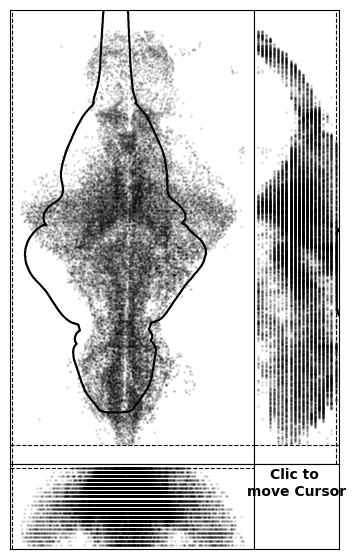

In [778]:
fig = plt.figure(figsize=(7,7))
ortho = OrthoAxes(fig, coords, interactive=True)
ortho.plot_contour(get_ZBrain_brain_countours(), color="k")
ortho.scatter(coords, color="k", alpha=0.1, s=1)

In [126]:
neurons = [47375, 11727, 17677, 1]

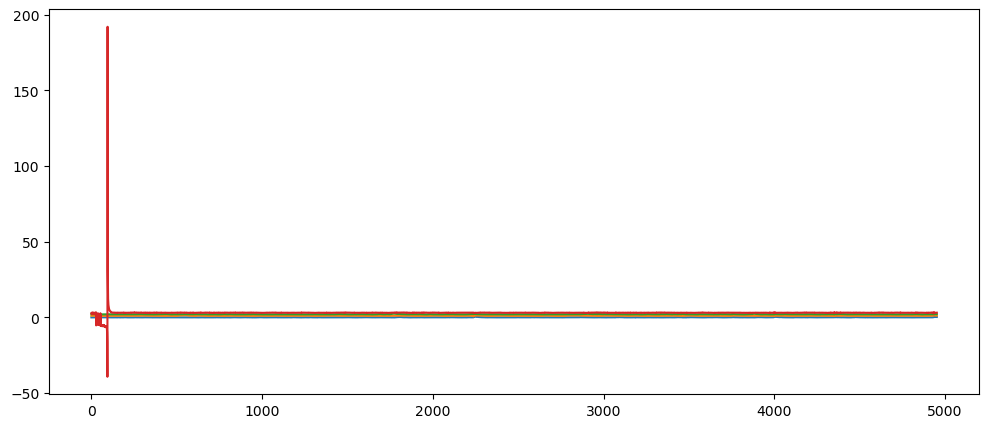

In [127]:
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(dffs[:,neurons]+np.arange(len(neurons)))

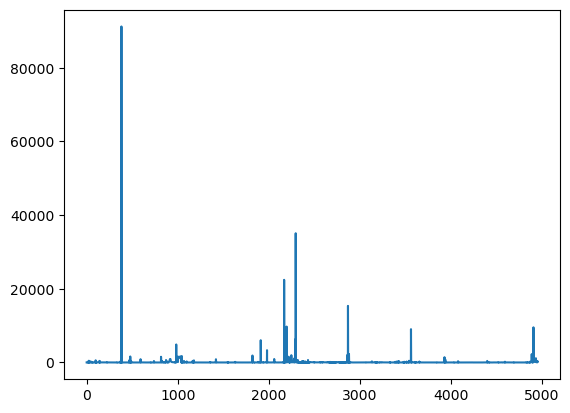

In [128]:
plt.plot(dffs.max(axis=1))

In [13]:
# also show spikes for those neurons

# Creating a 2D dataset

In [39]:
%matplotlib inline

In [22]:
%matplotlib qt

In [140]:
r_interest = [
    123, # Rhombencephalon - Anterior Cluster of nV Trigeminal Motorneurons
    174, # Rhombencephalon - Inferior Olive
    107, # Mesencephalon - Tegmentum
    96,  # Mesencephalon - NucMLF (nucleus of the medial longitudinal fascicle)
    97,  #Mesencephalon - Oculomotor Nucleus nIII
]

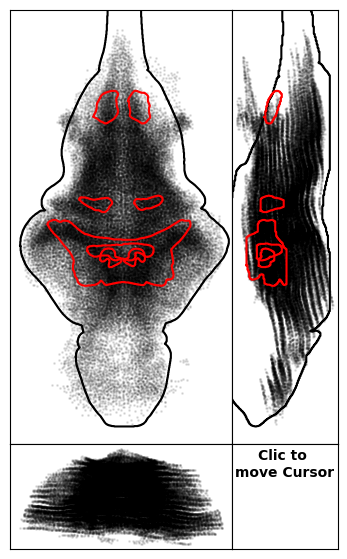

In [141]:
fig = plt.figure(figsize=(7,7))
ortho = OrthoAxes(fig, coords, interactive=True)
ortho.plot_contour(get_ZBrain_brain_countours(), color="k")
ortho.scatter(coords, color="k", alpha=0.1, s=1)
ortho.plot_contour(get_ZBrain_regions_countours(regions_inds=r_interest), color="r")

In [142]:
def inds_from_region(region):
    return np.where(regions[region]==1)[0]

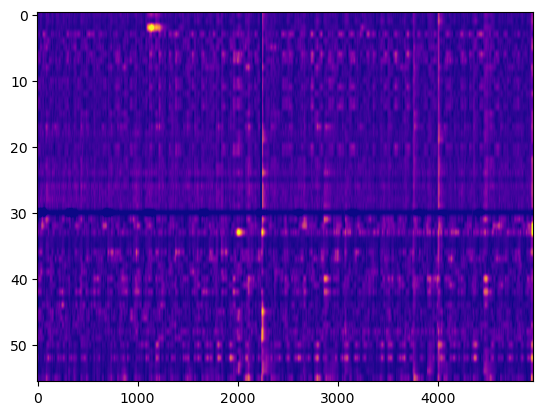

In [143]:
plt.imshow(dffs[:,inds_from_region(r_interest[1])].T, aspect="auto", cmap="plasma", vmin=0, vmax=1)

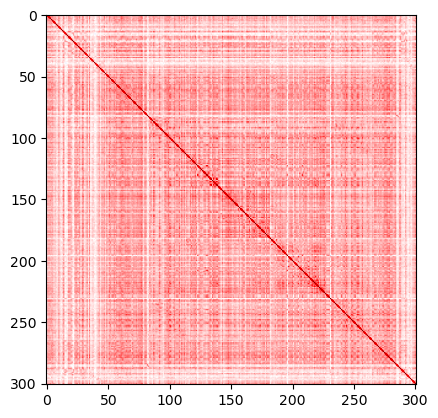

In [145]:
plt.imshow(np.corrcoef(spikes[:,inds_from_region(r_interest[4])].T), cmap="seismic", vmin=-1, vmax=+1)

In [50]:
%matplotlib inline

In [9]:
zmin, zmax = 0.182, 0.199

In [51]:
zmin, zmax = -0.099, -0.061

In [52]:
height = (zmax-zmin)*1000
height #um

38.00000000000001

In [53]:
inds = np.where( (coords[2] > zmin)*(coords[2] < zmax))[0]
flat_coords = coords[:,inds]
flat_dffs = dffs[:,inds]

In [54]:
len(inds)

7186

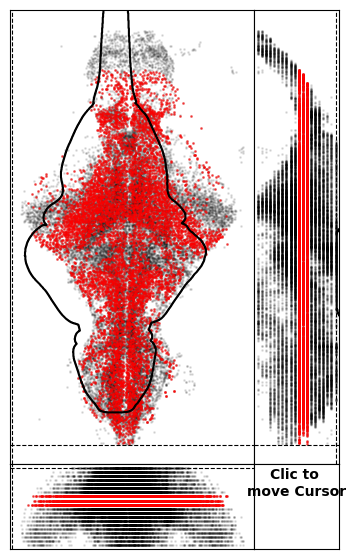

In [55]:
fig = plt.figure(figsize=(7,7))
ortho = OrthoAxes(fig, coords, interactive=True)
ortho.plot_contour(get_ZBrain_brain_countours(), color="k")
ortho.scatter(coords, color="k", alpha=0.1, s=1)
ortho.scatter(flat_coords, color="r", alpha=0.5, s=1)

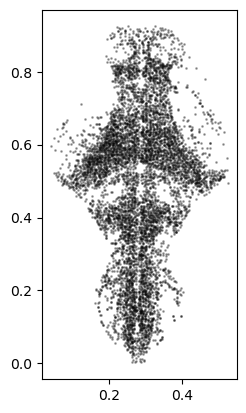

In [56]:
fig, ax = plt.subplots()
ax.scatter(flat_coords[0], flat_coords[1], s=1, color="k", alpha=0.3)
ax.set_aspect("equal")

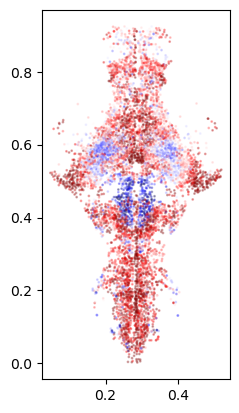

In [57]:
fig, ax = plt.subplots()
ax.scatter(flat_coords[0], flat_coords[1], s=1, c=symCorr[inds], alpha=0.3, cmap="seismic", vmin=-0.5, vmax=0.5)
ax.set_aspect("equal")

In [58]:
Corr1 = np.corrcoef(flat_dffs.T)

In [59]:
Corr = Corr1#[:1000,:1000]

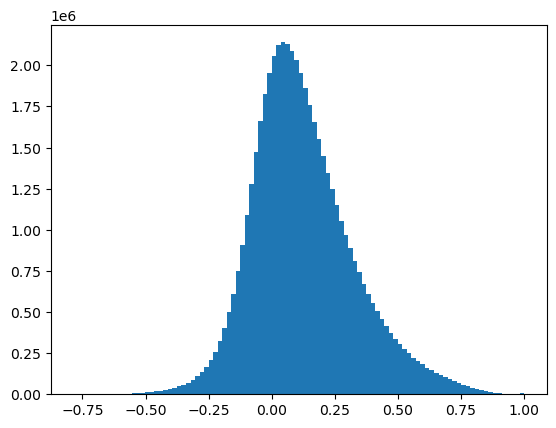

In [60]:
plt.hist(Corr.ravel(), bins=100);

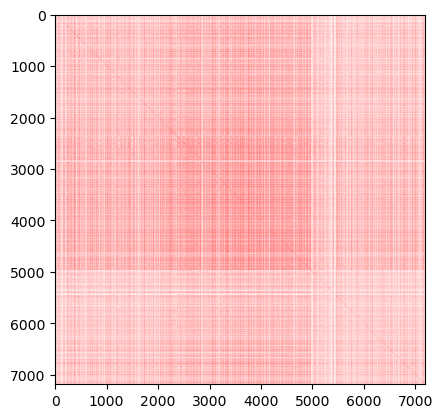

In [61]:
plt.imshow(Corr, cmap="seismic", vmin=-1, vmax=+1)

In [62]:
from scipy.cluster.hierarchy import ward, fcluster, optimal_leaf_ordering, leaves_list, cut_tree, dendrogram

In [63]:
condenced_dist = 1-Corr[np.triu_indices_from(Corr, k=+1)]

In [64]:
Z = ward(condenced_dist)

In [ ]:
opt_leaf = optimal_leaf_ordering(Z, condenced_dist)

In [66]:
opt_order = leaves_list(opt_leaf)

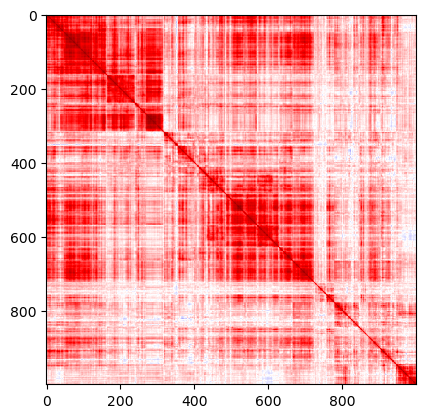

In [67]:
plt.imshow(Corr[opt_order][:,opt_order], cmap="seismic", vmin=-1, vmax=+1)

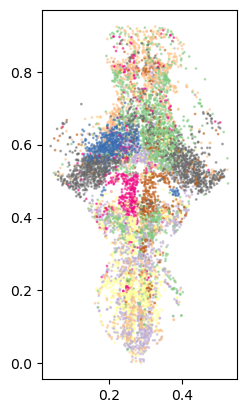

In [71]:
labels = cut_tree(Z, n_clusters=9)
fig, ax = plt.subplots()
ax.scatter(flat_coords[0], flat_coords[1], s=1, c=labels, cmap="Accent", alpha=0.5)
ax.set_aspect("equal")

# Kmeans

In [83]:
from sklearn.cluster import KMeans

## On Flat data

In [245]:
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(flat_dffs.T)

KMeans(n_clusters=5, n_init=10)

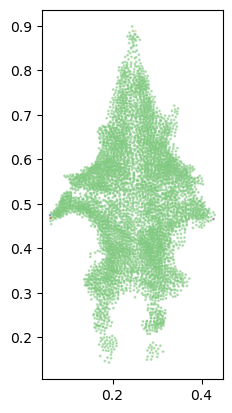

In [246]:
fig, ax = plt.subplots()
ax.scatter(flat_coords[0], flat_coords[1], s=1, c=kmeans.labels_, cmap="Accent", alpha=0.5)
ax.set_aspect("equal")

In [249]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([6541,    1,    1,    1,    1]))

In [20]:
from sklearn.manifold import TSNE
# https://distill.pub/2016/misread-tsne/

In [21]:
tnse = TSNE(n_components=2, perplexity=25)
X_embedded = tnse.fit_transform(flat_dffs.T)

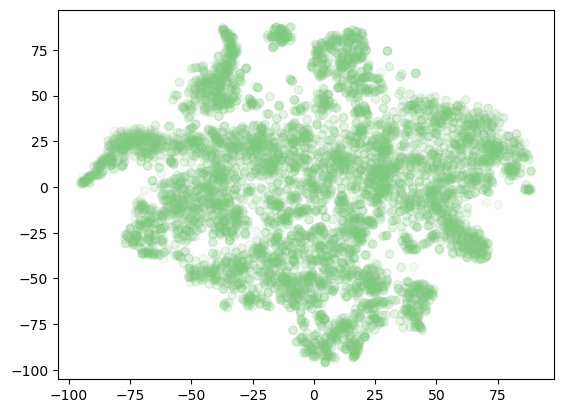

In [22]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], alpha=0.1, c=kmeans.labels_, cmap="Accent")

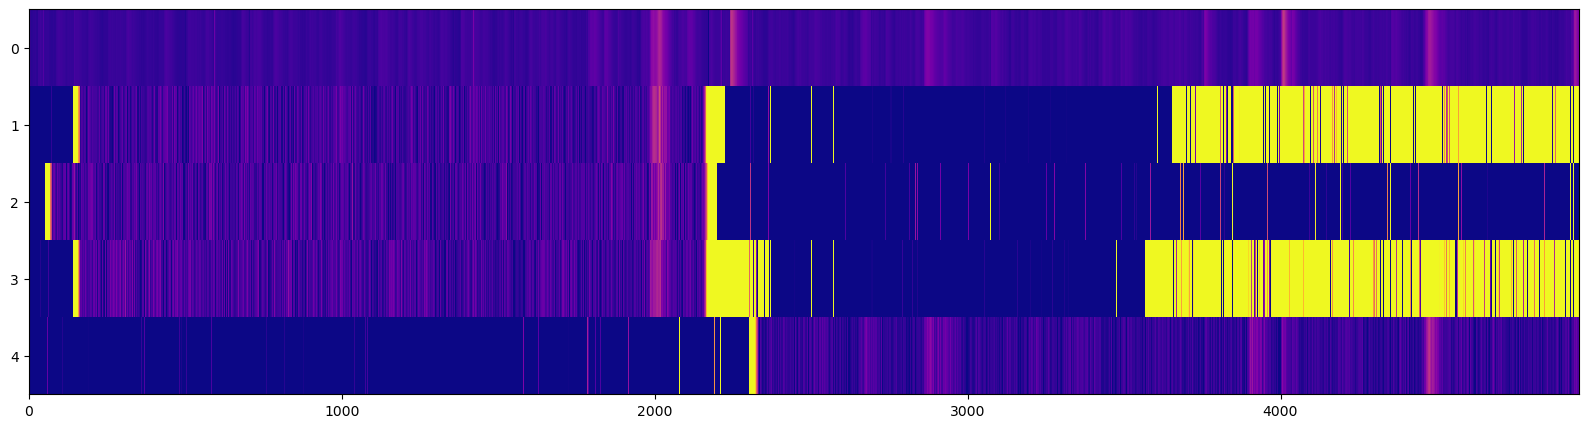

In [23]:
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(kmeans.cluster_centers_, aspect="auto", interpolation="none", cmap="plasma", vmin=0, vmax=0.7)

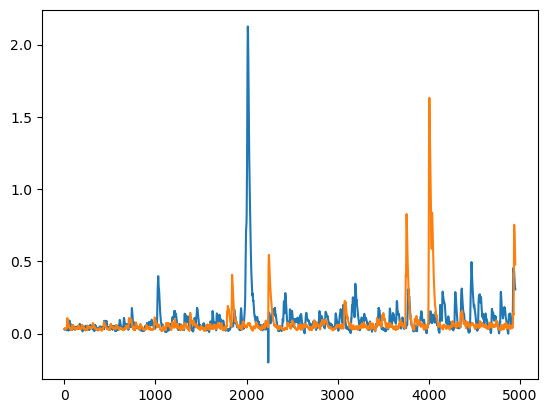

In [107]:
plt.plot(kmeans.cluster_centers_[[1,3]].T)
#plt.ylim(-10,10)

In [108]:
Y = kmeans.cluster_centers_[kmeans.labels_].T

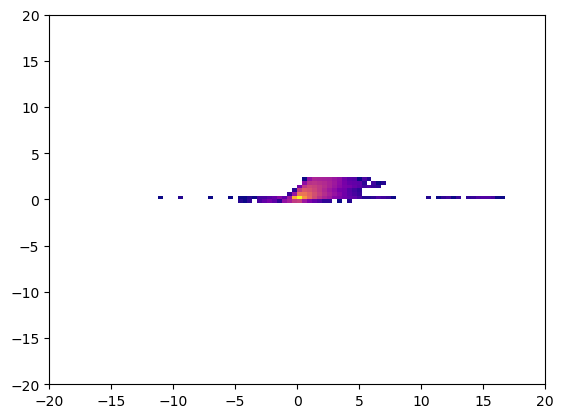

In [110]:
plt.hist2d(flat_dffs.ravel(), Y.ravel(), bins=100, cmap="plasma", norm=LogNorm(), range=[[-20,+20],[-20,+20]]);

In [111]:
C = np.corrcoef(kmeans.cluster_centers_)

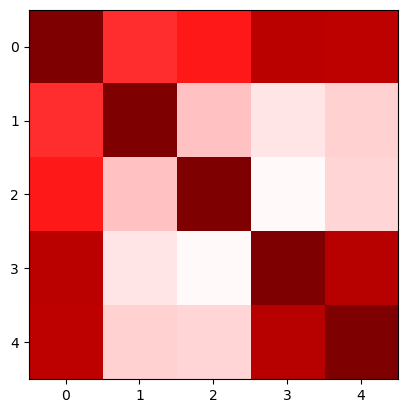

In [112]:
plt.imshow(C, cmap="seismic", vmin=-1, vmax=+1)

## On Whole Brain data

In [24]:
r = 113
inds = np.where(regions[r]==1)[0]
dff = dffs[:,inds]
coord = coords[:,inds]

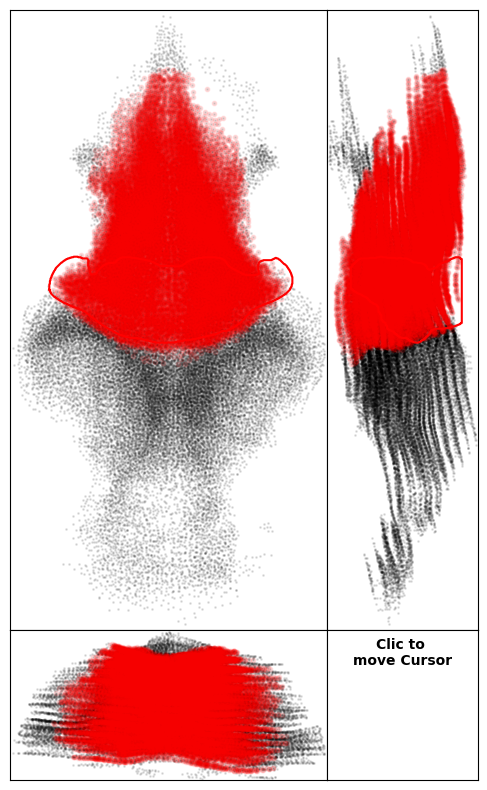

In [162]:
fig = plt.figure(figsize=(10,10))
ortho = OrthoAxes(fig, coords, interactive=True)
ortho.scatter(coords, color="k", alpha=0.1, s=1)
ortho.scatter(coord, color="r", alpha=0.1, s=10)
ortho.plot_contour(get_ZBrain_regions_countours(regions_inds=[r]), color="r")


In [33]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(dff.T)

/home/mkk/.conda/envs/ibio/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

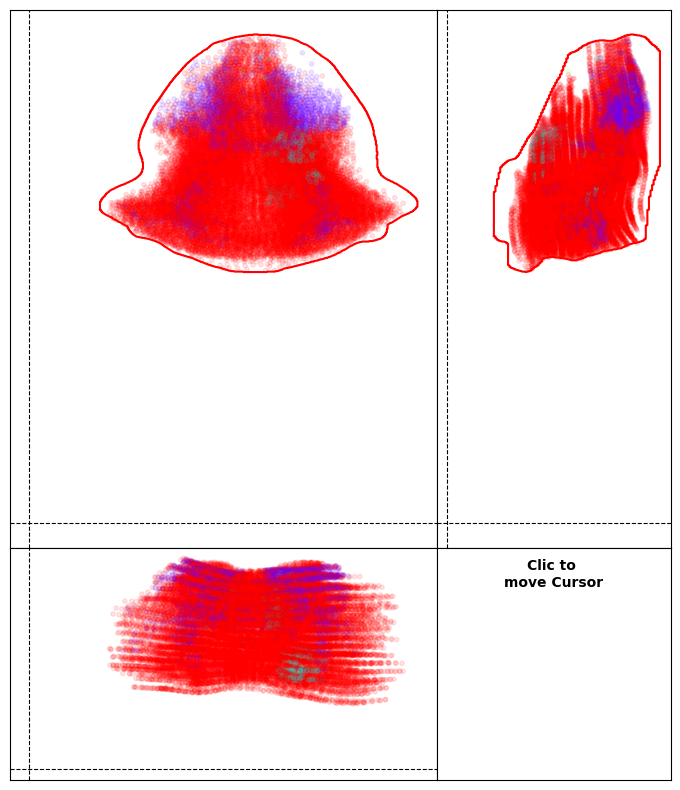

In [37]:
fig = plt.figure(figsize=(10,10))
ortho = OrthoAxes(fig, coord, interactive=True)
ortho.plot_contour(get_ZBrain_regions_countours(regions_inds=[r]), color="r")
ortho.scatter(coord, c=kmeans.labels_, alpha=0.1, s=10, cmap="hsv")

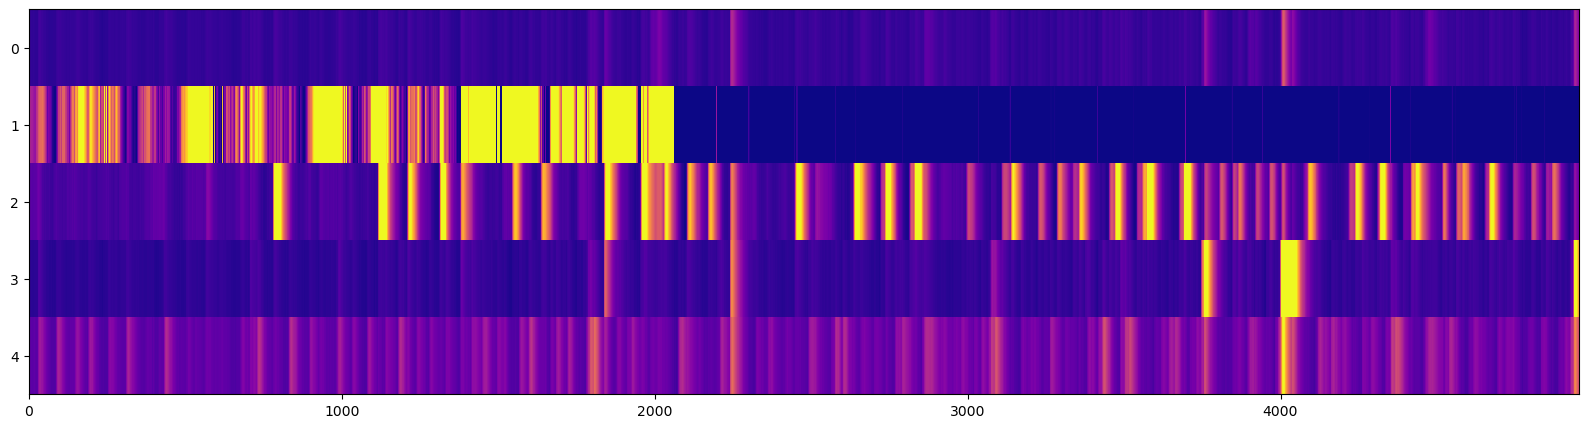

In [38]:
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(kmeans.cluster_centers_, aspect="auto", interpolation="none", cmap="plasma", vmin=0, vmax=0.7)

(-10.0, 10.0)

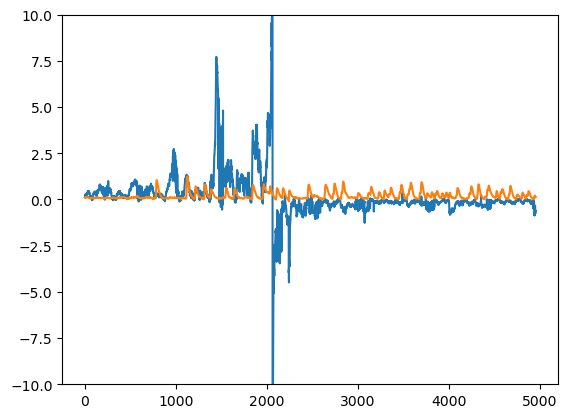

In [45]:
plt.plot(kmeans.cluster_centers_[[1,2]].T)
plt.ylim(-10,10)

In [46]:
C = np.corrcoef(kmeans.cluster_centers_)

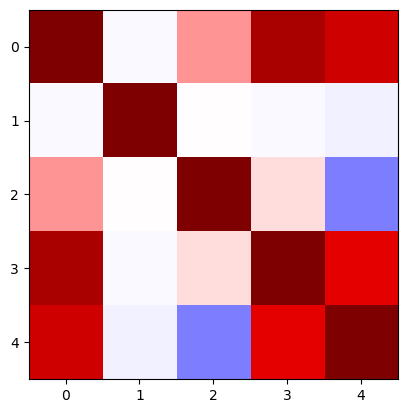

In [47]:
plt.imshow(C, cmap="seismic", vmin=-1, vmax=+1)

In [48]:
Y = kmeans.cluster_centers_[kmeans.labels_].T

In [49]:
Y.shape

(4953, 26471)

In [50]:
from matplotlib.colors import LogNorm

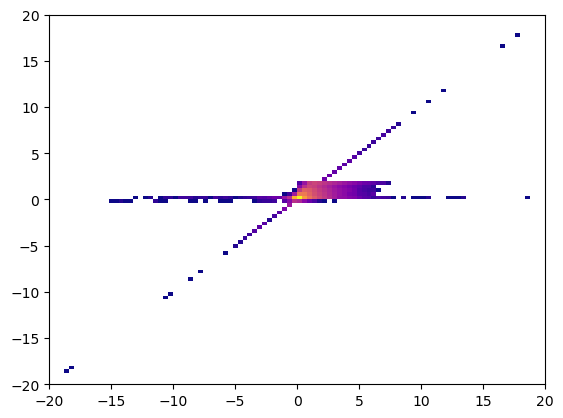

In [51]:
plt.hist2d(dff.ravel(), Y.ravel(), bins=100, cmap="plasma", norm=LogNorm(), range=[[-20,+20],[-20,+20]]);

# Activity per region with PCA

In [129]:
r = 130 # 93, 113, 65

In [130]:
inds = np.where(regions[r]==1)[0]

In [158]:
fig = plt.figure(figsize=(10,10))
ortho = OrthoAxes(fig, coords, interactive=True)
ortho.scatter(coords, color="k", alpha=0.1, s=1)
ortho.plot_contour(get_ZBrain_regions_countours(regions_inds=[r]), color="r")

In [132]:
dff = dffs[:,inds]
dff.shape

(4953, 3352)

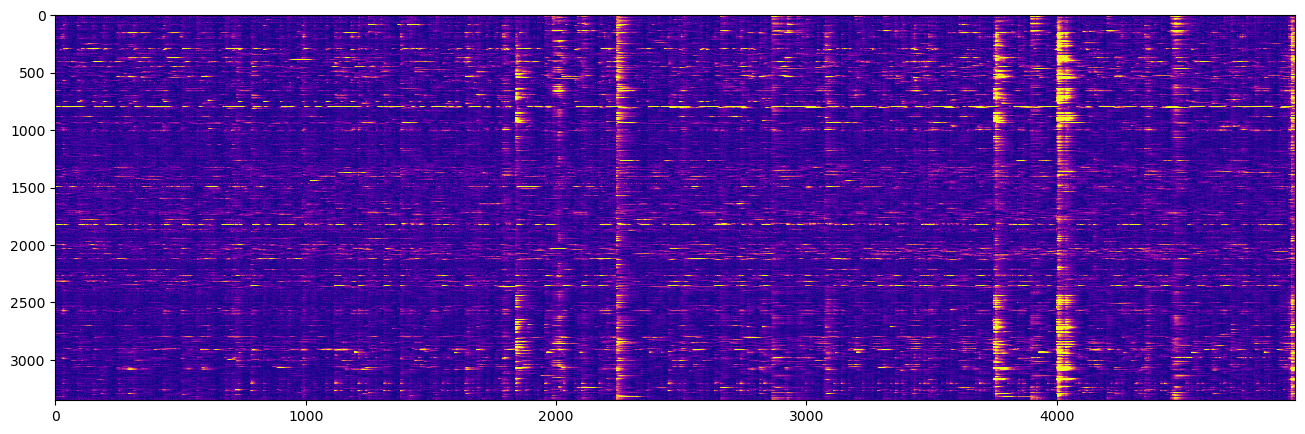

In [133]:
fig, ax = plt.subplots(figsize=(16,5))
ax.imshow(dff.T, aspect="auto", cmap="plasma", vmin=0, vmax=0.5, interpolation="none")

In [ ]:
from sklearn.decomposition import PCA, FastICA

In [ ]:
pca = PCA(n_components=4)
pca.fit(dff)
Y = pca.transform(dff)

In [ ]:
plt.plot(Y)
#plt.ylim(-200,200)

In [ ]:
pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum()

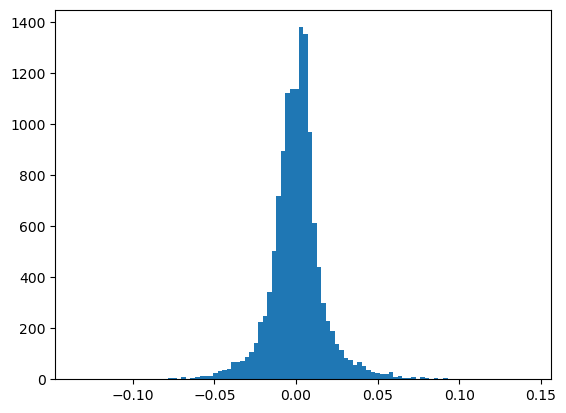

In [138]:
plt.hist(pca.components_.ravel(), bins=100);

In [166]:
%matplotlib inline

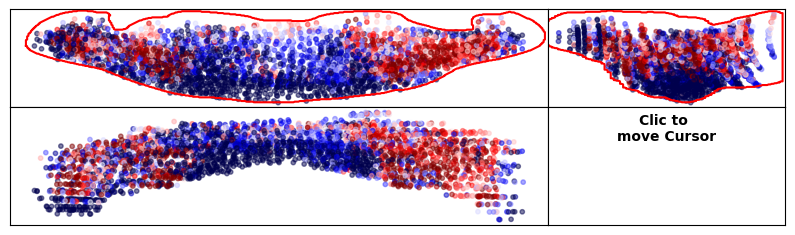

In [167]:
fig = plt.figure(figsize=(10,5))
ortho = OrthoAxes(fig, coords[:,inds], interactive=True)
ortho.plot_contour(get_ZBrain_regions_countours(regions_inds=[r]), color="r")
ortho.scatter(coords[:,inds], c=pca.components_[1], cmap="seismic", vmin=-0.01, vmax=+0.01, alpha=0.5, s=10)

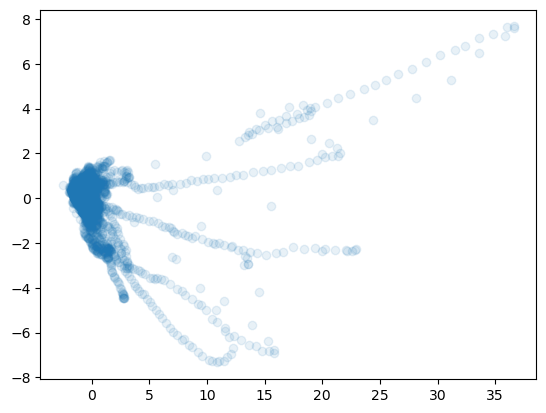

In [168]:
plt.scatter(Y[:,0], Y[:,1], alpha=0.1)

In [21]:
%matplotlib qt

In [25]:
fig = plt.figure(figsize=(7,7))
ortho = OrthoAxes(fig, coords, interactive=True)
ortho.plot_contour(get_ZBrain_brain_countours(), color="k")
ortho.scatter(coords, color="k", alpha=0.1, s=1)

In [26]:
midline = 0.283#0.252

In [27]:
coords.shape

(3, 30971)

In [28]:
def mirror(X, x0):
    x = X[0]
    dist = x-x0
    sym = x0 - dist
    return np.array([sym, X[1], X[2]])

In [29]:
i = 22909
X = coords[:,i]
Xp = mirror(X, midline)

fig = plt.figure(figsize=(7,7))
ortho = OrthoAxes(fig, coords, interactive=True)
ortho.scatter(coords, color="k", alpha=0.1, s=1)
ortho.scatter(X, color="blue")
ortho.scatter(Xp, color="red")

In [30]:
def mirror_neurons(X, x0, r=0.01):
    Xp = mirror(X, x0)
    dists = np.sqrt(((coords - Xp[:,np.newaxis])**2).sum(axis=0))
    inds = np.where(np.sqrt(((coords - Xp[:,np.newaxis])**2).sum(axis=0)) < 0.01)[0]
    return inds

In [31]:
i = 22909
X = coords[:,i]
syms = mirror_neurons(X, midline)

fig = plt.figure(figsize=(7,7))
ortho = OrthoAxes(fig, coords, interactive=True)
ortho.scatter(coords, color="k", alpha=0.1, s=1)
ortho.scatter(X, color="blue")
ortho.scatter(coords[:,syms], color="red", s=1)

In [32]:
def mean_corr(act1, act_multi):
    return np.corrcoef(act1, act_multi)[0,1:].mean()

In [33]:
mean_corr(dffs[:,i].T, dffs[:,syms].T)

-0.1224869208772923

In [34]:
from tqdm import tqdm
def symetrical_corr(neuron_coords, neuron_dffs):
    corrs = np.empty(neuron_dffs.shape[1])
    for i in tqdm(range(neuron_dffs.shape[1])):
        X = neuron_coords[:,i]
        syms = mirror_neurons(X, midline)
        if len(syms) == 0:
            corrs[i] = np.nan
        else:
            corrs[i] = mean_corr(neuron_dffs[:,i].T, neuron_dffs[:,syms].T)
    return corrs

In [35]:
symCorr = symetrical_corr(coords, dffs)

100%|█████████████████████████████████████████████████| 30971/30971 [00:14<00:00, 2076.36it/s]


In [36]:
plt.hist(symCorr, bins=100);

In [37]:
fig = plt.figure(figsize=(7,7))
ortho = OrthoAxes(fig, coords, interactive=True)
ortho.scatter(coords, c=symCorr, alpha=0.1, s=1, vmin=-0.5, vmax=+0.5, cmap="seismic")

In [38]:
inds = np.where(symCorr < 0)[0]

In [39]:
fig = plt.figure(figsize=(7,7))
ortho = OrthoAxes(fig, coords[:,inds], interactive=True)
ortho.scatter(coords[:,inds], c=symCorr[inds], alpha=0.1, s=1, vmin=-0.5, vmax=+0.5, cmap="seismic")

# Clustering and Dim reduction for Danionella

Yesterday, the questions were :

    - Can we identify neurons which follow those signals ?
    - Where are those neurons located in the brain ?

Today, the questions are :

    - Can we cluster neurons into groups ?
    - Can we interpret the activity of those clusters ?

## Getting the Data

In [5]:
filepath = "content/banyuls_data/fish1_different_directions.hdf5"

In [6]:
file = h5py.File(filepath, "r")
h5tree_view(file)

. content/banyuls_data/fish1_different_directions.hdf5
├── 📁brain
│   ├── 🔢coordinates ⚙️(3, 30971)float64
│   ├── 🔢fluorescence ⚙️(30971, 960)float64
│   ├── 🔢times ⚙️(960,)float64
├── 📁stimulus
│   ├── 🔢direction ⚙️(28752,)float64
│   ├── 🔢speed ⚙️(28752,)float64
│   ├── 🔢times ⚙️(28752,)float64
├── 📁tail
│   ├── 🔢coordinates ⚙️(72213, 11, 2)float64
│   ├── 🔢deflection ⚙️(72213,)float64
│   ├── 🔢deflection_mean ⚙️(72213,)float64
│   ├── 🔢deflection_std ⚙️(72213,)float64
│   ├── 🔢times ⚙️(72213,)float64


In [217]:
coords = file["/brain/coordinates"][:]*1.e-3
dffs = file["/brain/fluorescence"][:].T
brain_time = file["/brain/times"][:]

direction = file["/stimulus/direction"][:]
stim_time = file["/stimulus/times"][:]
direction = np.interp(brain_time, stim_time, direction)

tail = file["/tail/deflection_mean"][:]
tail_time = file["/tail/times"][:]
tail = np.interp(brain_time, tail_time, tail)

## Investigating the data

In [291]:
%matplotlib inline

In [290]:
fig = plt.figure(figsize=(7,7))
ortho = OrthoAxes(fig, coords, interactive=True)
ortho.scatter(coords, c="k", alpha=0.1, s=1)

libGL error: MESA-LOADER: failed to open iris: /home/mkk/.conda/envs/ibio/lib/python3.10/site-packages/zmq/backend/cython/../../../../.././libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /usr/lib/dri/iris_dri.so) (search paths /usr/lib/dri, suffix _dri)
libGL error: failed to load driver: iris
libGL error: MESA-LOADER: failed to open iris: /home/mkk/.conda/envs/ibio/lib/python3.10/site-packages/zmq/backend/cython/../../../../.././libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /usr/lib/dri/iris_dri.so) (search paths /usr/lib/dri, suffix _dri)
libGL error: failed to load driver: iris
libGL error: MESA-LOADER: failed to open swrast: /home/mkk/.conda/envs/ibio/lib/python3.10/site-packages/zmq/backend/cython/../../../../.././libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /usr/lib/dri/swrast_dri.so) (search paths /usr/lib/dri, suffix _dri)
libGL error: failed to load driver: swrast


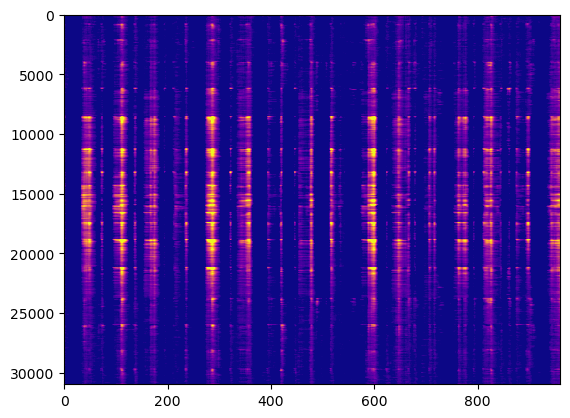

In [54]:
plt.imshow(dffs.T, aspect="auto", cmap="plasma", vmin=-0., vmax=0.2)

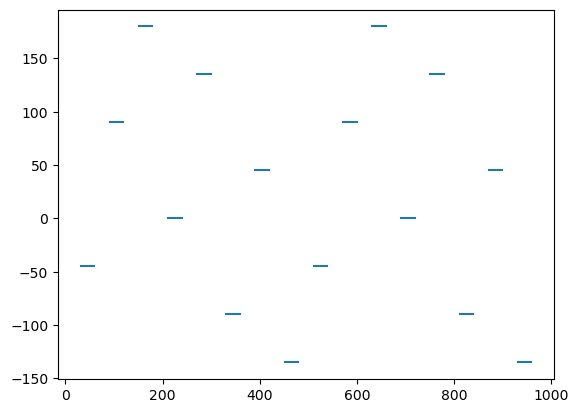

In [64]:
plt.plot(direction)

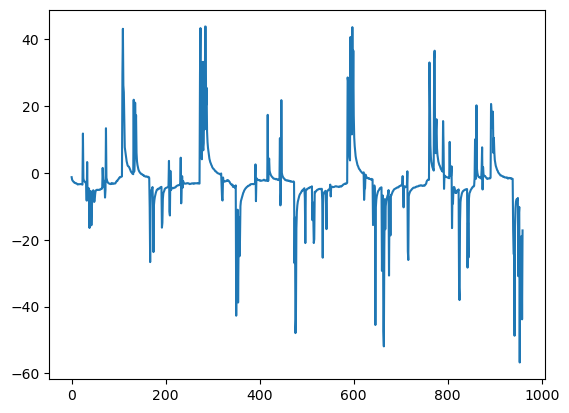

In [218]:
plt.plot(tail)

## Clusterize with KMeans

In [220]:
kmeans_params = {
    "init":"k-means++",
    "n_init":10, 
    "random_state":0,
    "max_iter":300,
}

### (Optional) Finding optimal number of clusters

based on https://realpython.com/k-means-clustering-python/

⚠️ is quite computationaly intensive. Don't run those cells, just read and try to understand

In [250]:
from tqdm import tqdm
from sklearn.metrics import silhouette_score, silhouette_samples
from kneed import KneeLocator

In [238]:
SSEs = []
SILS = []
Ks = []

In [239]:
for k in tqdm(range(2,10)):
    Ks.append(k)
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(dffs.T)

    # Method : elbow (sum of squared errors)
    SSEs.append(kmeans.inertia_)

    # Method : silhouette coefficient
    score = silhouette_score(dffs.T, kmeans.labels_)
    SILS.append(score)

100%|███████████████████████████████████████████████████████████| 8/8 [05:34<00:00, 41.81s/it]


In [240]:
kl = KneeLocator(Ks, SSEs, curve="convex", direction="decreasing")

In [241]:
kl.elbow

5

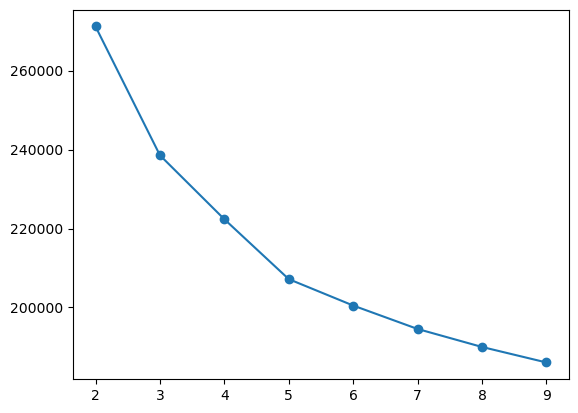

In [243]:
plt.plot(Ks, SSEs, "-o")

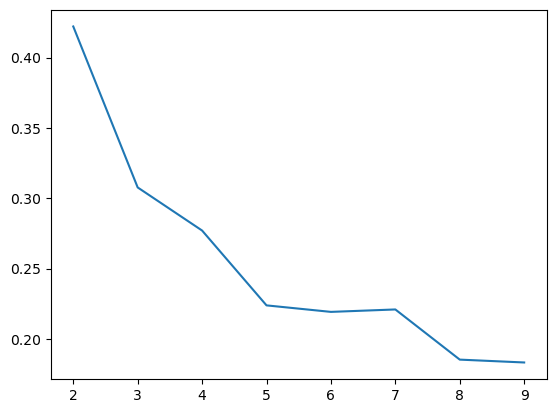

In [246]:
plt.plot(Ks, SILS)
#plt.ylim(-1,1)

In [286]:
%time
score = silhouette_score(dffs.T, kmeans.labels_)
score

0.22388480122885301

In [287]:
%time
score = silhouette_score(dffs.T, kmeans.labels_, metric="correlation")
score

-0.07292527175969128

### Clustering brain activity

In [281]:
kmeans = KMeans(n_clusters=5, **kmeans_params)
kmeans.fit(dffs.T)

KMeans(n_clusters=5, n_init=10, random_state=0)

In [301]:
%matplotlib inline

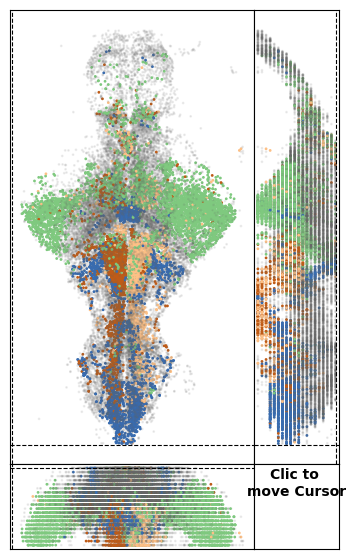

In [302]:
fig = plt.figure(figsize=(7,7))
ortho = OrthoAxes(fig, coords, interactive=True)
ortho.scatter(coords, c=kmeans.labels_, s=1, cmap="Accent", alpha=np.where(kmeans.labels_==4,0.1,1))

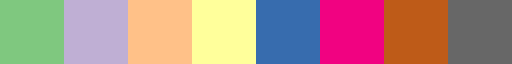

In [308]:
plt.cm.Accent

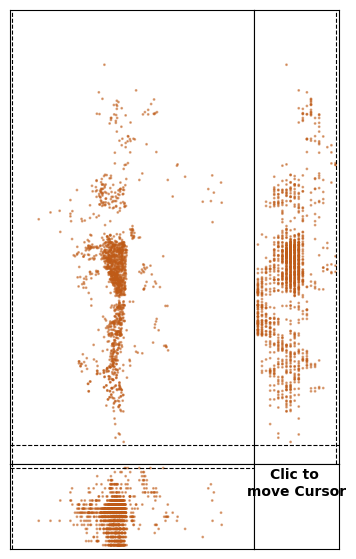

In [469]:
k = 3
inds = np.where(kmeans.labels_==k)[0]
fig = plt.figure(figsize=(7,7))
ortho = OrthoAxes(fig, coords, interactive=True)
ortho.scatter(coords[:,inds], c=kmeans.labels_[inds], s=1, cmap="Accent", alpha=0.5, vmin=kmeans.labels_.min(), vmax=kmeans.labels_.max())

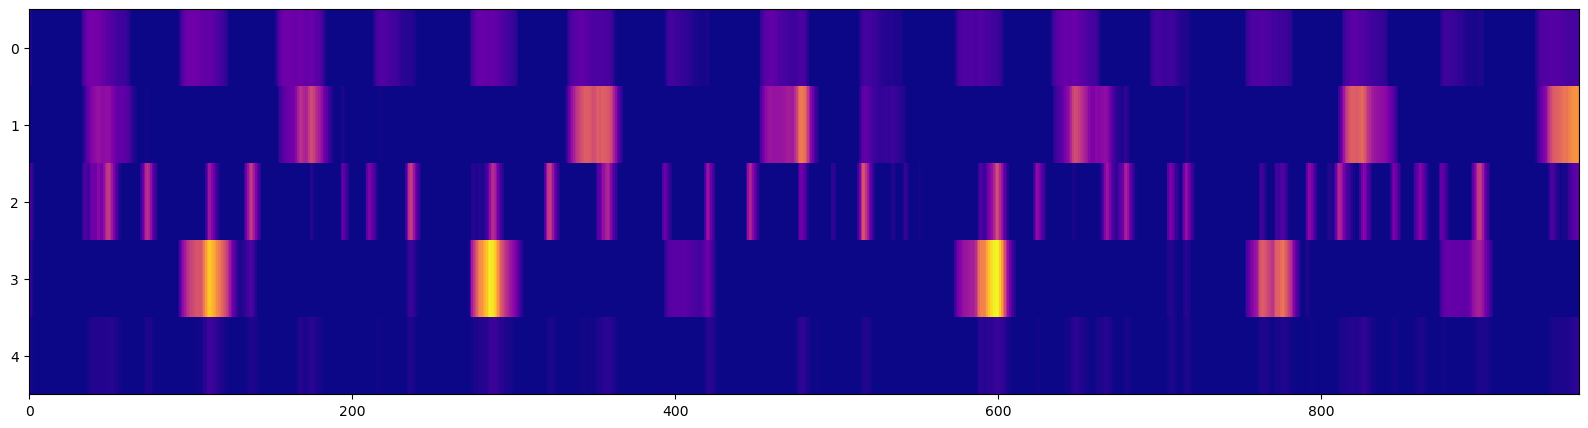

In [285]:
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(kmeans.cluster_centers_, aspect="auto", interpolation="none", cmap="plasma", vmin=0, vmax=0.7)

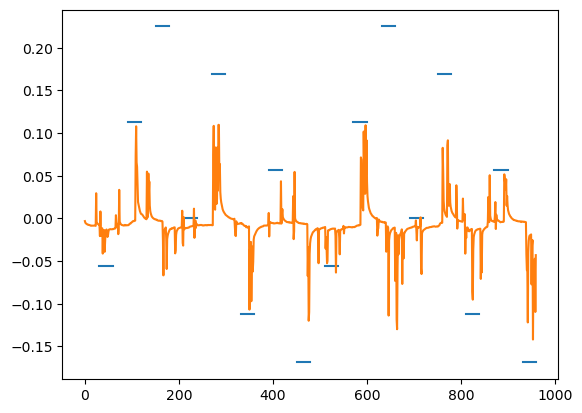

In [365]:
plt.plot(direction/800)
plt.plot(tail/400)

### Interpreting Clusters

In [188]:
flow_on = np.where(np.isfinite(direction), 1, 0)

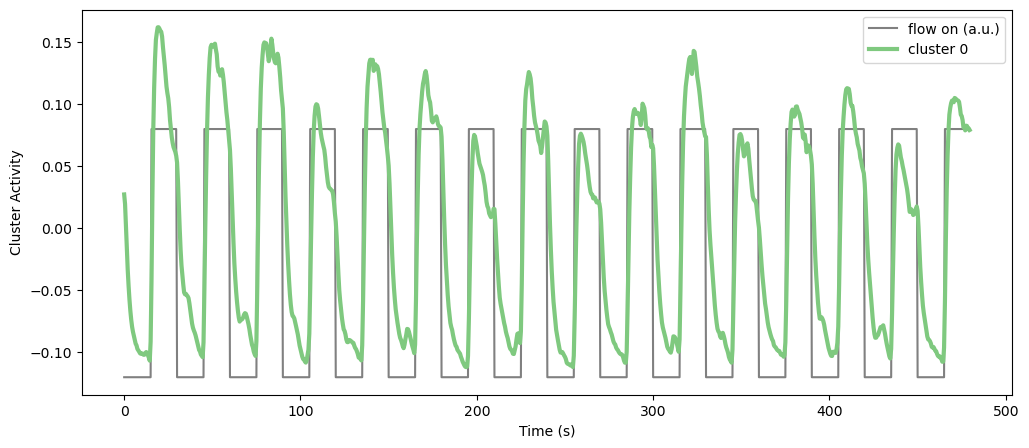

In [357]:
k = 0
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(brain_time, (flow_on-0.6)/5, color="grey", label="flow on (a.u.)")
ax.plot(brain_time, kmeans.cluster_centers_[k], color=plt.cm.Accent(np.linspace(0,1,5))[k], linewidth=3, label=f"cluster {k}")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Cluster Activity")
ax.legend()

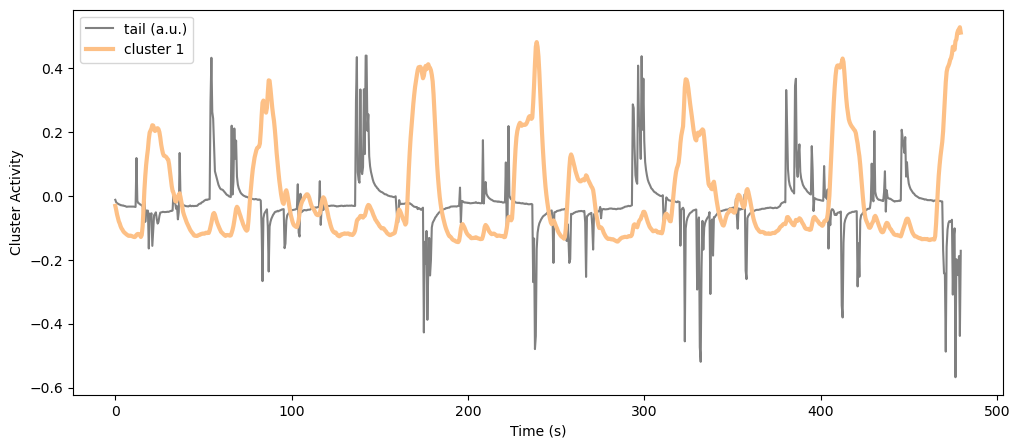

In [358]:
k = 1
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(brain_time, (tail-0)/100, color="grey", label="tail (a.u.)")
ax.plot(brain_time, kmeans.cluster_centers_[k], color=plt.cm.Accent(np.linspace(0,1,5))[k], linewidth=3, label=f"cluster {k}")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Cluster Activity")
ax.legend()

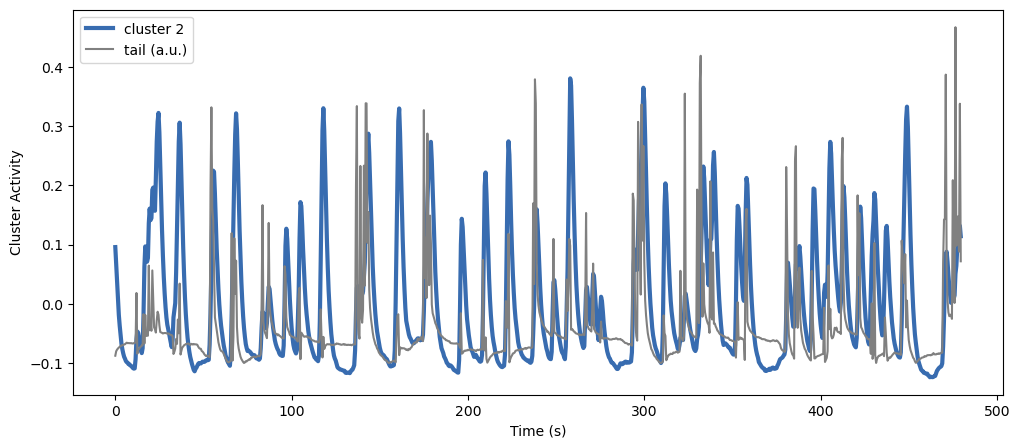

In [364]:
k = 2
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(brain_time, kmeans.cluster_centers_[k], color=plt.cm.Accent(np.linspace(0,1,5))[k], linewidth=3, label=f"cluster {k}")
ax.plot(brain_time, (np.abs(tail))/100 - 0.1, color="grey", label="tail (a.u.)")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Cluster Activity")
ax.legend()

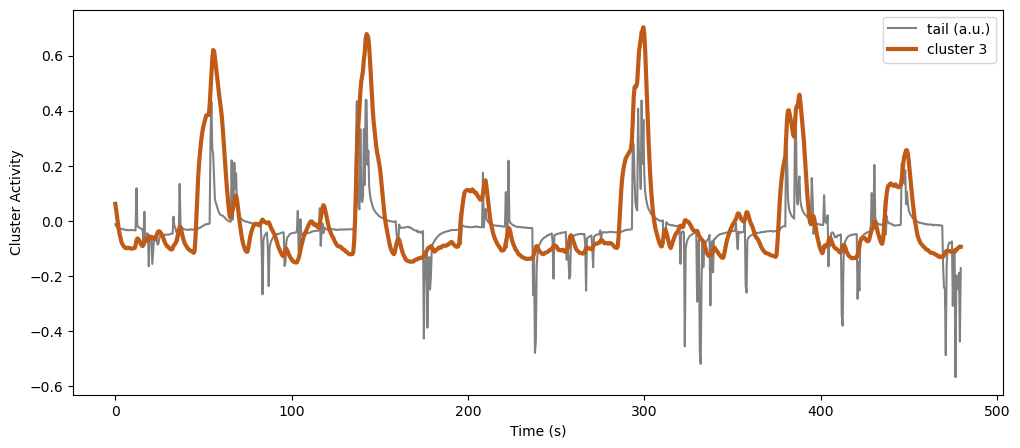

In [462]:
k = 3
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(brain_time, (tail-0)/100, color="grey", label="tail (a.u.)")
ax.plot(brain_time, kmeans.cluster_centers_[k], color=plt.cm.Accent(np.linspace(0,1,5))[k], linewidth=3, label=f"cluster {k}")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Cluster Activity")
ax.legend()

### Investigating single cluster

In [895]:
k = 2

In [896]:
small_inds = np.where(kmeans.labels_==k)[0]
len(small_inds)

1972

In [897]:
small_dffs = dffs[:,small_inds] #- kmeans.cluster_centers_[k][:,np.newaxis]
small_coords = coords[:,small_inds]

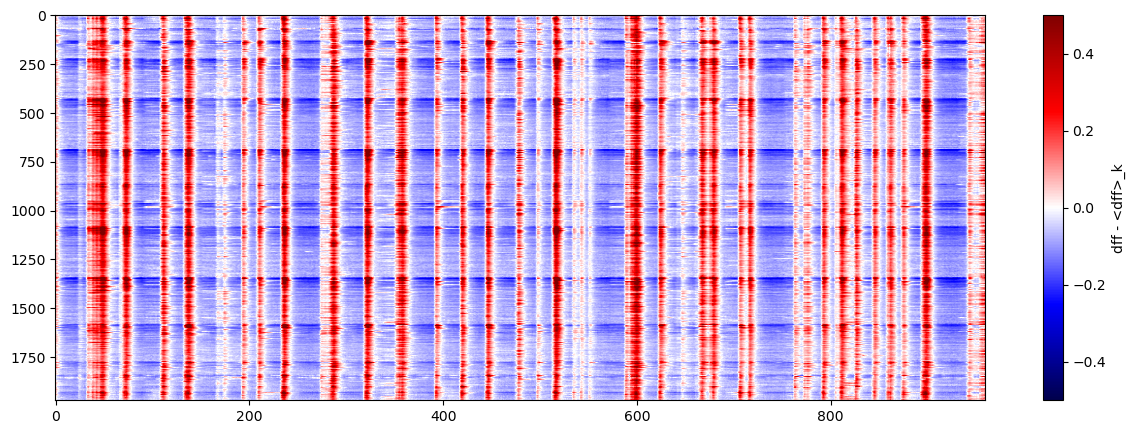

In [898]:
fig, ax = plt.subplots(figsize=(15,5))
h = ax.imshow(small_dffs.T, aspect="auto", cmap="seismic", vmin=-0.5, vmax=+0.5)
fig.colorbar(h, ax=ax, label="dff - <dff>_k")

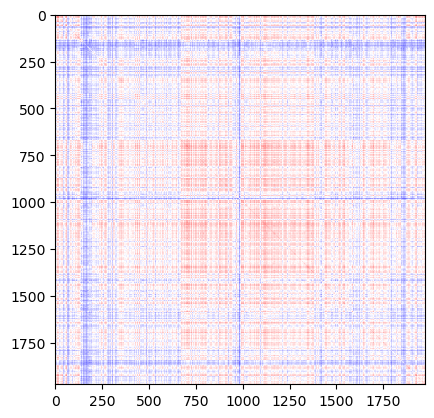

In [899]:
small_C = np.corrcoef(small_dffs.T)
h = plt.imshow(small_C-small_C.mean(), cmap="seismic", vmin=-1, vmax=+1)
fig.colorbar(h, ax=ax, label="Correlation Coefficient")

In [900]:
from scipy.cluster import hierarchy as hier

In [901]:
condensed_dist = 1-small_C[np.triu_indices_from(small_C, k=+1)]

In [902]:
Z = hier.linkage(condensed_dist, metric="correlation", method="ward")

In [903]:
%%time
opt_leaf = hier.optimal_leaf_ordering(Z, condensed_dist)

CPU times: user 27.7 s, sys: 252 ms, total: 27.9 s
Wall time: 27.9 s


In [904]:
order = hier.leaves_list(opt_leaf)
order

array([1011, 1211,  722, ..., 1835,  381, 1313], dtype=int32)

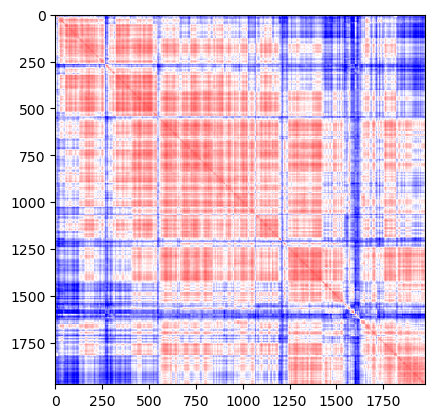

In [905]:
small_C = np.corrcoef(small_dffs.T)
h = plt.imshow(small_C[order][:,order]-small_C.mean(), cmap="seismic", vmin=-1, vmax=+1)
fig.colorbar(h, ax=ax, label="Correlation Coefficient")

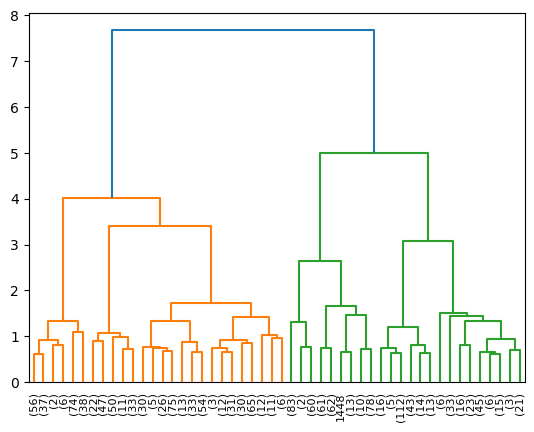

In [853]:
hier.dendrogram(Z, p=50, truncate_mode="lastp");

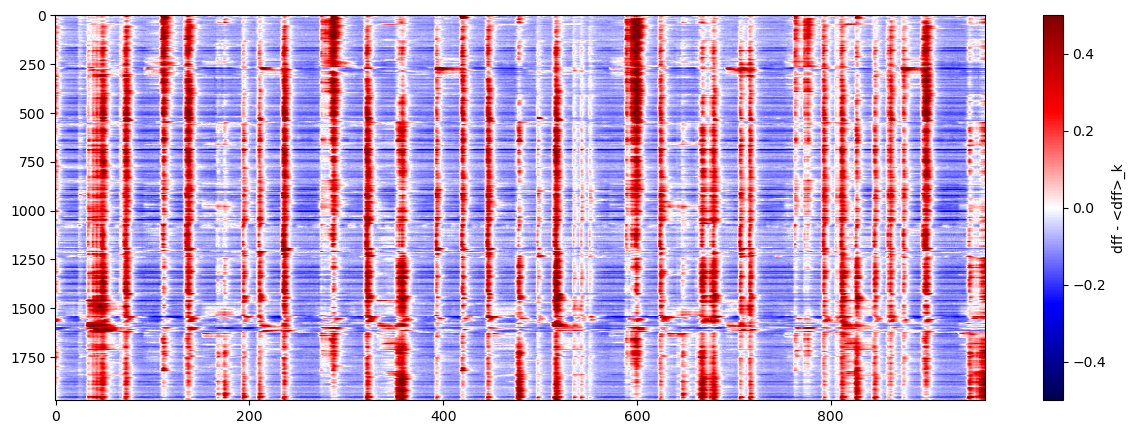

In [906]:
fig, ax = plt.subplots(figsize=(15,5))
h = ax.imshow(small_dffs.T[order], aspect="auto", cmap="seismic", vmin=-0.5, vmax=+0.5)
fig.colorbar(h, ax=ax, label="dff - <dff>_k")

In [907]:
Ks = np.arange(2,10)
dd = 1-small_C
np.fill_diagonal(dd, 0)
for k in tqdm(Ks):
    h_labels = hier.cut_tree(Z, n_clusters=k)[:,0]
    score = silhouette_score(dd, h_labels, metric="precomputed")
    print(score)

 25%|██████████████▊                                            | 2/8 [00:00<00:00,  7.24it/s]

0.24486145566367143
0.16736419027854252


 50%|█████████████████████████████▌                             | 4/8 [00:00<00:00,  7.96it/s]

0.18439822168858327
0.1355383479518717


 75%|████████████████████████████████████████████▎              | 6/8 [00:00<00:00,  8.21it/s]

0.09801974488611691
0.08657849231158223


100%|███████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.05it/s]

0.07832938567380889
0.0842331382594534


In [856]:
h_labels = hier.cut_tree(Z, n_clusters=10)[:,0]

In [782]:
h_labels.shape

(4166,)

In [733]:
from sklearn.manifold import TSNE
# https://distill.pub/2016/misread-tsne/

In [734]:
%%time
tnse = TSNE(n_components=2, perplexity=25)
X_embedded = tnse.fit_transform(small_dffs.T)

CPU times: user 49.6 s, sys: 1.2 s, total: 50.8 s
Wall time: 7.01 s


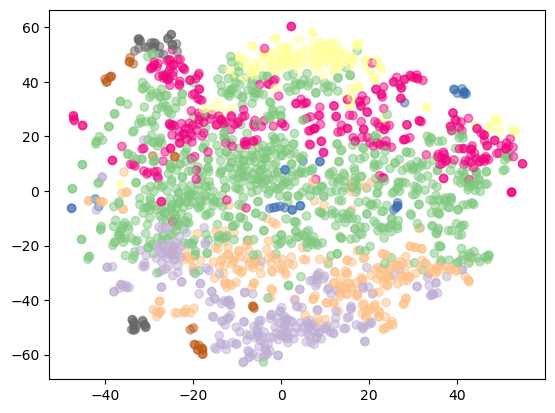

In [735]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], alpha=0.5, c=h_labels, cmap="Accent")

In [783]:
small_dffs[:,inds].shape

(960, 1, 0)

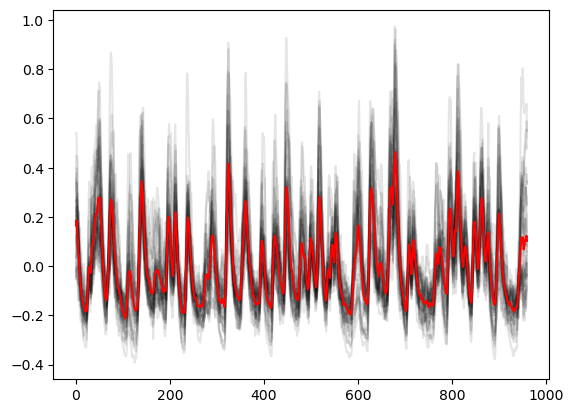

In [936]:
inds = np.where(h_labels==5)
plt.plot(dffs[:,small_inds[inds]], color="k", alpha=0.1);
plt.plot(dffs[:,small_inds[inds]].mean(axis=-1), color="red")

In [937]:
def x_mean(X,Y):
    x = np.unique(direction)
    y = np.empty_like(x)
    dy = np.empty_like(x)
    for i in range(len(x)):
        ys = Y[np.where(X==x[i])[0]]
        if len(ys) > 0:
            y[i] = ys.mean()
            dy[i] = ys.std()
        else:
            y[i] = np.nan
            dy[i] = np.nan
    return x, y, dy

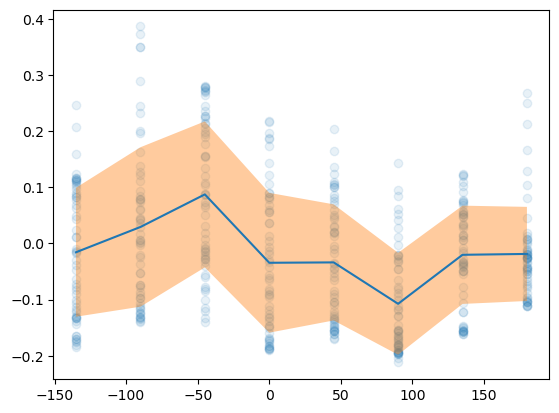

In [938]:
plt.scatter(direction, dffs[:,small_inds[inds]].mean(axis=-1), alpha=0.1)
x,y,dy = x_mean(direction, dffs[:,small_inds[inds]].mean(axis=-1))
plt.plot(x,y)
plt.fill_between(x, y+dy, y-dy, alpha=0.4)

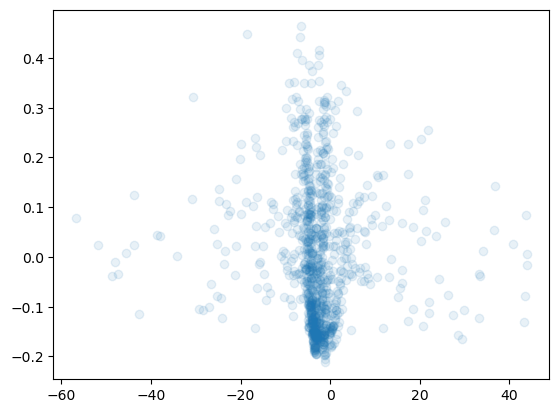

In [939]:
plt.scatter(tail, dffs[:,small_inds[inds]].mean(axis=-1), alpha=0.1)

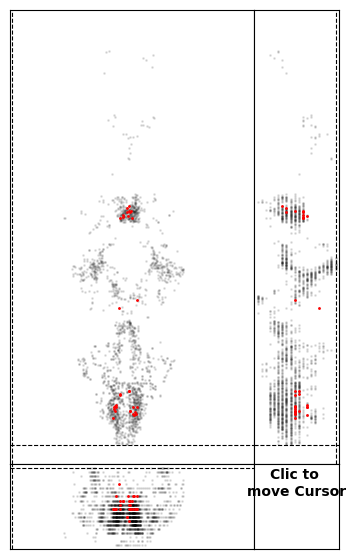

In [940]:
fig = plt.figure(figsize=(7,7))
ortho = OrthoAxes(fig, coords, interactive=True)
#ortho.scatter(coords, c="k", alpha=0.01, s=1)
ortho.scatter(small_coords, c="k", alpha=0.1, s=1)
ortho.scatter(small_coords[:,inds], s=1, color="red")

## PCA

In [941]:
from sklearn.decomposition import PCA, FastICA

In [942]:
pca = PCA(n_components=10)
pca.fit(dffs)
Y = pca.transform(dffs)

In [943]:
pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum()

(array([0.22100566, 0.21146222, 0.10748958, 0.05405937, 0.03033867,
        0.02664934, 0.01578563, 0.01516453, 0.01183246, 0.01134557]),
 0.7051330221802282)

In [977]:
sig = Y[:,0]

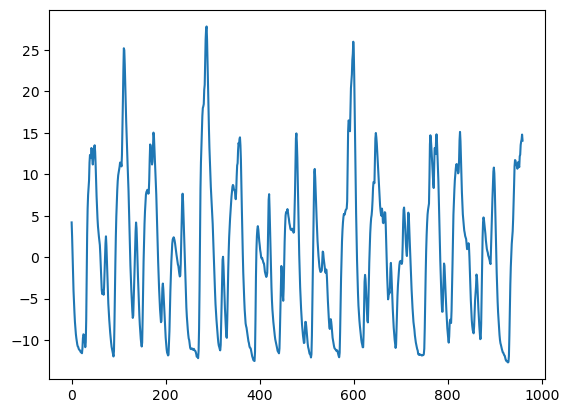

In [978]:
plt.plot(sig)
#plt.ylim(-200,200)

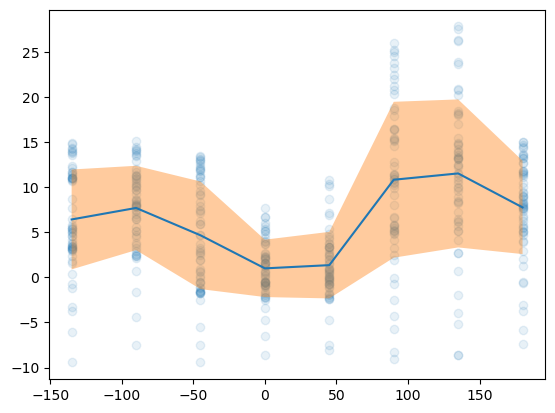

In [979]:
plt.scatter(direction, sig, alpha=0.1)
x,y,dy = x_mean(direction, sig)
plt.plot(x,y)
plt.fill_between(x, y+dy, y-dy, alpha=0.4)

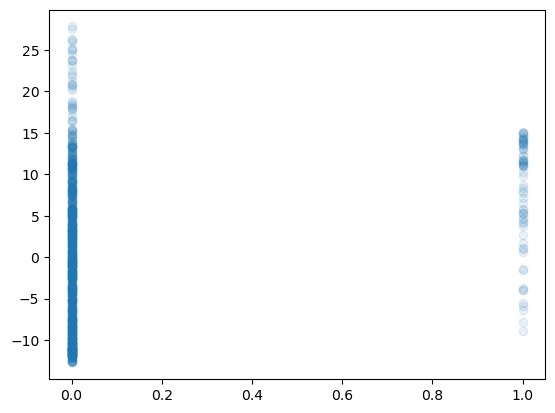

In [976]:
sig = Y[:,0]
plt.scatter(tail<-10, sig, alpha=0.1)

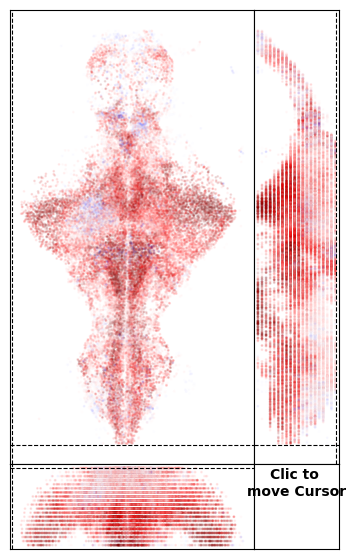

In [980]:
fig = plt.figure(figsize=(7,7))
ortho = OrthoAxes(fig, coords, interactive=True)
ortho.scatter(coords, c=pca.components_[0], cmap="seismic", vmin=-0.01, vmax=+0.01, alpha=0.1, s=1)